In [ ]:
%who

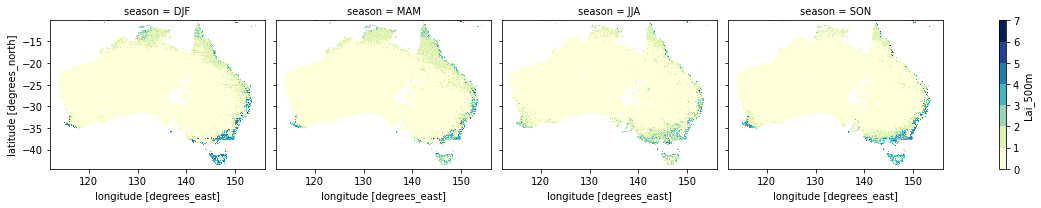

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

out_dir = 'figures/drought_2017to2020/'
figname_prefix = 'lai500m'
levels = np.linspace(0, 7, 8)

data_dir = '/g/data/w97/ad9701/MODIS/MCD15A2H.006/after_QC/seas_mean/'
fname_prefix = 'MCD15A2H.006_500m_aid0001_'

seas_order = ['DJF', 'MAM', 'JJA', 'SON']

for year in [2019]:#range(2003, 2022):
    fname = data_dir + fname_prefix + str(year) + '_QC.nc'
    ds = xr.open_dataset(fname)
    ds['Lai_500m'].load()
    
    lat_size = abs((ds.lat[0]-ds.lat[-1]).values)
    lon_size = abs((ds.lon[0]-ds.lon[-1]).values)
    aspect = lon_size/lat_size

    ds['Lai_500m'].sel(season = seas_order).plot(col = "season", col_wrap = 4, aspect = aspect, size = 3, cmap = "YlGnBu", levels = levels) #"RdBu_r")
    plt.savefig(out_dir + figname_prefix + '_' + str(year) + '_byseas.png')
    del ds, fname

In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import glob
import matplotlib.pyplot as plt
%run -i drought_2017to2020/alldata_info.py

data_dir = '/g/data/w97/ad9701/drought_2017to2020/precip_data/'

out_dir = 'figures/drought_2017to2020/precip/'
figname_prefix = 'spi_3m'
fname_prefix = 'spi_3m'
vname = 'SPI3'
#levels = 7 #np.linspace(0, 7, 8)

#### Seasonal plots

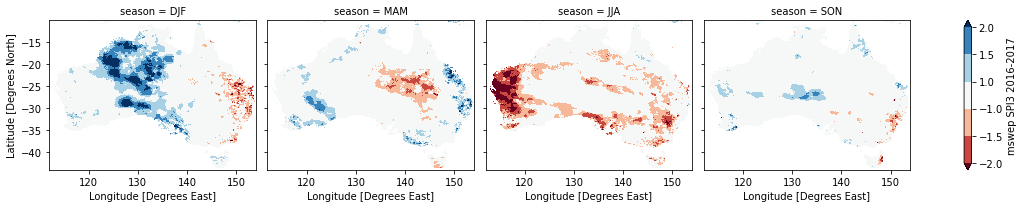

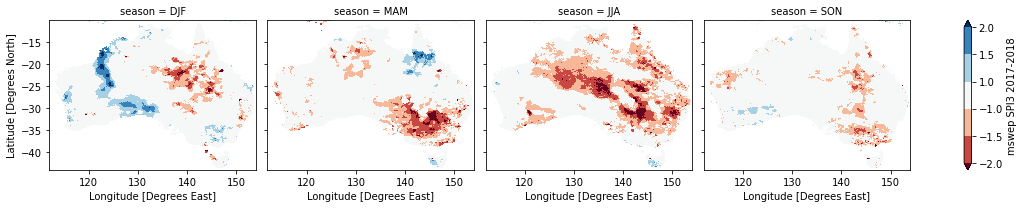

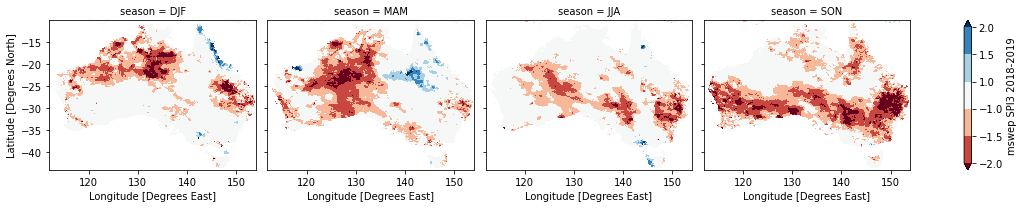

In [3]:
seas_order = ['DJF', 'MAM', 'JJA', 'SON']
levels = [-2, -1.5, -1, 1, 1.5, 2]

d = 'mswep'
for year in [2017, 2018, 2019]:#range(2003, 2022):
    fname = glob.glob(data_dir + fname_prefix + '*' + d  + '*.nc')[0]
    ds = xr.open_dataset(fname)
    da = ds[vname].sel(time = slice(str(year-1)+'-12', str(year)+'-11')).load()
    # if alldata_dict[d]['land_mask']:
    #     ds_mask = xr.open_dataset(data_dir + d + '_land_mask.nc')
    #     da = da*ds_mask['land_mask']
    ds_mask = xr.open_dataset(data_dir + d + '_land_mask.nc')
    da = da*ds_mask['land_mask']
    
    lat_size = abs((ds.lat[0]-ds.lat[-1]).values)
    lon_size = abs((ds.lon[0]-ds.lon[-1]).values)
    aspect = lon_size/lat_size

    da.groupby('time.season').mean().rename(d + ' ' + vname + ' ' + str(year-1) + '-' + str(year)).sel(season = seas_order).plot(x = "lon", y = "lat", col = "season", col_wrap = 4, aspect = aspect, size = 3, cmap = "RdBu", levels = levels) #"RdBu_r") "YlGnBu"
    plt.savefig(out_dir + figname_prefix + '_' + str(year-1) + '_' + str(year) + '_byseas' + '_' + d + '.png')
    # del ds, fname

#### Monthly plots

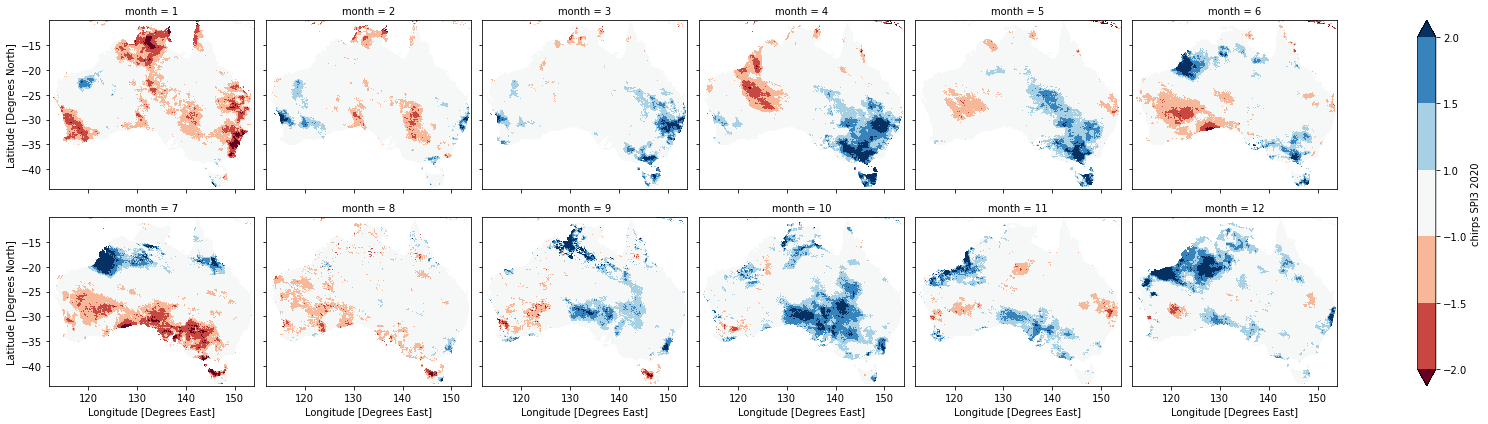

In [16]:
levels = [-2, -1.5, -1, 1, 1.5, 2]

d = 'chirps'
for year in [2020]: #[2017, 2018, 2019]:#range(2003, 2022):
    fname = glob.glob(data_dir + fname_prefix + '*' + d  + '*.nc')[0]
    ds = xr.open_dataset(fname)
    da = ds[vname].sel(time = slice(str(year), str(year))).load()
    ds_mask = xr.open_dataset(data_dir + d + '_land_mask.nc')
    da = da*ds_mask['land_mask']
    
    lat_size = abs((ds.lat[0]-ds.lat[-1]).values)
    lon_size = abs((ds.lon[0]-ds.lon[-1]).values)
    aspect = lon_size/lat_size

    da.groupby('time.month').mean().rename(d + ' ' + vname + ' ' + str(year)).plot(x = "lon", y = "lat", col = "month", col_wrap = 6, aspect = aspect, size = 3, cmap = "RdBu", levels = levels) #"RdBu_r") "YlGnBu"
    plt.savefig(out_dir + figname_prefix + '_' + str(year) + '_bymon' + '_' + d + '.png')
    # del ds, fname

### Areas consistently in drought: SPI

In [4]:
import numpy as np
import xarray as xr
import pandas as pd
import glob
import matplotlib.pyplot as plt

data_dir = '/g/data/w97/ad9701/drought_2017to2020/precip_data/'

out_dir = 'figures/drought_2017to2020/precip/'
figname_prefix = 'spi_3m'
fname_prefix = 'spi_3m'
vname = 'SPI3'

time_slice = slice('2017-01-01', '2019-12-31')

filename = glob.glob(data_dir + 'spi_3m_precipitation_mswep_*.nc')[0]
ds_mswep = xr.open_dataset(filename)
#ds_mswep = ds_mswep.sel(time = time_slice)

filename = glob.glob(data_dir + 'spi_3m_agcd_*.nc')[0]
ds_agcd = xr.open_dataset(filename)
#ds_agcd = ds_agcd.sel(time = time_slice)

filename = glob.glob(data_dir + 'spi_3m_chirps_*.nc')[0]
ds_chirps = xr.open_dataset(filename)
#ds_chirps = ds_chirps.sel(time = time_slice)

### Consistent baseline

In [1]:
%who

Interactive namespace is empty.


In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import glob
import matplotlib.pyplot as plt

data_dir = '/g/data/w97/ad9701/drought_2017to2020/precip_data/SPI3_baseline_198101_202005/'

out_dir = 'figures/drought_2017to2020/precip/baseline_198101_202005/'
figname_prefix = 'spi_3m'
fname_prefix = 'spi_3m'
vname = 'SPI3'

time_slice = slice('2017-01-01', '2019-12-31')

In [3]:
filename = glob.glob(data_dir + 'SPI3_agcd_monthly*.nc')
ds_agcd = xr.open_mfdataset(filename)
ds_agcd = ds_agcd.sel(time = time_slice)

filename = glob.glob(data_dir + 'SPI3_mswep_monthly*.nc')[0]
ds_mswep = xr.open_dataset(filename)
ds_mswep = ds_mswep.sel(time = time_slice)

filename = glob.glob(data_dir + 'SPI3_chirps_monthly*.nc')[0]
ds_chirps = xr.open_dataset(filename)
ds_chirps = ds_chirps.sel(time = time_slice)

In [5]:
data_name_2 = ['mswep', 'agcd', 'chirps']
mask_list = []
for d in data_name_2:
    ds_mask = xr.open_dataset('/g/data/w97/ad9701/drought_2017to2020/precip_data/' + d + '_land_mask.nc')
    mask_list.append(ds_mask['land_mask'])

In [6]:
data_name = ['MSWEP', 'AGCD', 'CHIRPS']
spi_list_dry = []
spi_list_dry_bymon = []
spi_list_severe_dry = []
spi_list_severe_dry_bymon = []

data_list = [ds_mswep, ds_agcd, ds_chirps]
for i_ds in range(len(data_list)):
    ds = data_list[i_ds]
    da1 = ds['SPI3'].where(ds['SPI3']<= -1).count('time').rename('count months')
    da1_mon = ds['SPI3'].where(ds['SPI3']<= -1).groupby('time.month').count('time').rename('count months')
    da1 = da1*mask_list[i_ds]
    da1_mon = da1_mon*mask_list[i_ds]
    spi_list_dry.append(da1)
    spi_list_dry_bymon.append(da1_mon)
    
    da2 = ds['SPI3'].where(ds['SPI3']<= -1.5).count('time').rename('count months')
    da2_mon = ds['SPI3'].where(ds['SPI3']<= -1.5).groupby('time.month').count('time').rename('count months')
    da2 = da2*mask_list[i_ds]
    da2_mon = da2_mon*mask_list[i_ds] 
    spi_list_severe_dry.append(da2)
    spi_list_severe_dry_bymon.append(da2_mon)

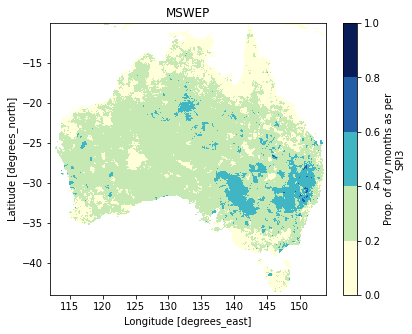

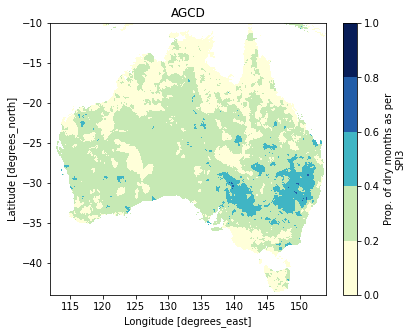

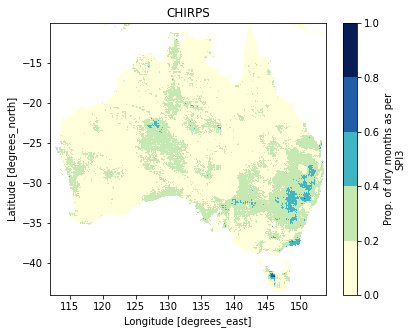

In [11]:
fig_dir = 'figures/drought_2017to2020/precip/baseline_198101_202005/'

import matplotlib.pyplot as plt

for idata in range(len(data_name)):
    lat_size = abs((spi_list_dry[idata].lat[0]-spi_list_dry[idata].lat[-1]).values)
    lon_size = abs((spi_list_dry[idata].lon[0]-spi_list_dry[idata].lon[-1]).values)
    aspect = lon_size/lat_size

    levels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    ((spi_list_dry[idata]/36)*mask_list[idata]).rename('Prop. of dry months as per SPI3').plot(x = "lon", y = "lat", aspect = aspect, size = 5, levels = levels, cmap = "YlGnBu") #, cmap = "RdBu", levels = levels
    plt.title(data_name[idata])
    plt.savefig(fig_dir + 'Prop_dry_months_asper_spi3_' + data_name[idata] + '.png')

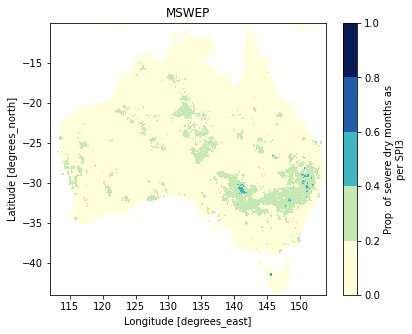

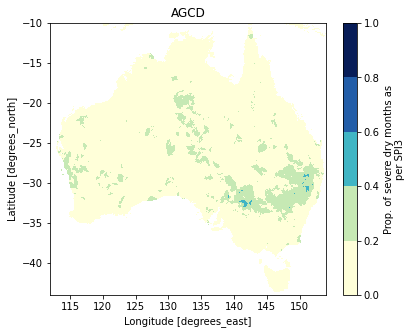

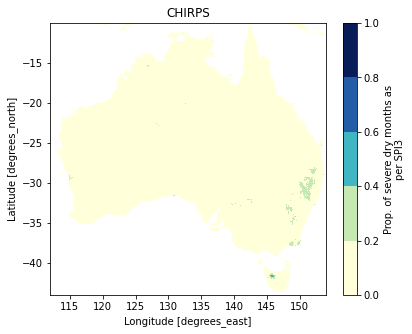

In [13]:
fig_dir = 'figures/drought_2017to2020/precip/baseline_198101_202005/'

import matplotlib.pyplot as plt

for idata in range(len(data_name)):
    lat_size = abs((spi_list_severe_dry[idata].lat[0]-spi_list_severe_dry[idata].lat[-1]).values)
    lon_size = abs((spi_list_severe_dry[idata].lon[0]-spi_list_severe_dry[idata].lon[-1]).values)
    aspect = lon_size/lat_size

    levels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    ((spi_list_severe_dry[idata]/36)*mask_list[idata]).rename('Prop. of severe dry months as per SPI3').plot(x = "lon", y = "lat", aspect = aspect, size = 5, levels = levels, cmap = "YlGnBu") #, cmap = "RdBu", levels = levels
    plt.title(data_name[idata])
    plt.savefig(fig_dir + 'Prop_severe_dry_months_asper_spi3_' + data_name[idata] + '.png')

### Proportion dry only during the cooler months

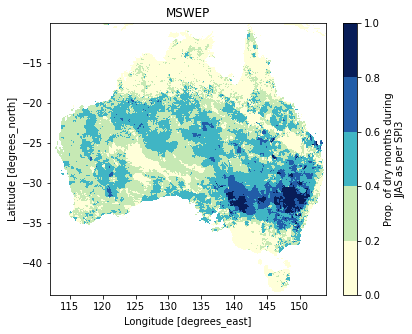

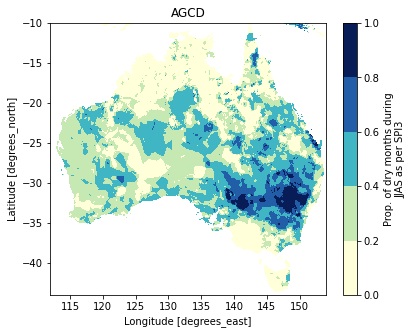

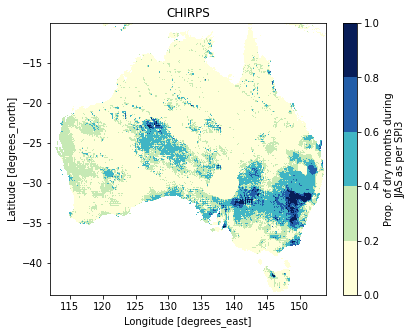

In [14]:
fig_dir = 'figures/drought_2017to2020/precip/baseline_198101_202005/'
mon_sel = slice(6, 9)  # selected months JJAS, which appear mostly dry for each year from 2017 to 2019
total_months = 4*3     # 4 months from each year

import matplotlib.pyplot as plt

for idata in range(len(data_name)):
    lat_size = abs((spi_list_dry_bymon[idata].lat[0]-spi_list_dry_bymon[idata].lat[-1]).values)
    lon_size = abs((spi_list_dry_bymon[idata].lon[0]-spi_list_dry_bymon[idata].lon[-1]).values)
    aspect = lon_size/lat_size

    levels = [0, 0.2, 0.4, 0.6, 0.8, 1.0001]
    ((spi_list_dry_bymon[idata].sel(month = slice(6, 9)).sum('month')/total_months)*mask_list[idata]).rename('Prop. of dry months during JJAS as per SPI3').plot(x = "lon", y = "lat", aspect = aspect, size = 5, levels = levels, cmap = "YlGnBu") #, cmap = "RdBu", levels = levels
    plt.title(data_name[idata])
    plt.savefig(fig_dir + 'Prop_dry_JJAS_months_asper_spi3_' + data_name[idata] + '.png')

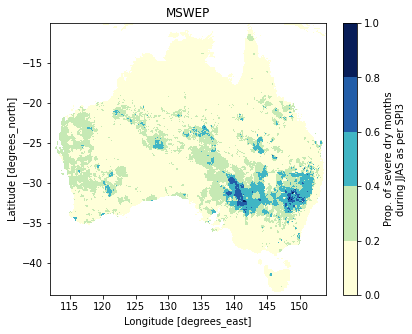

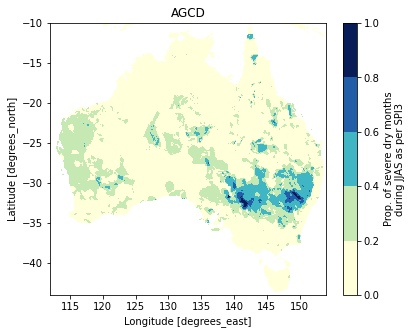

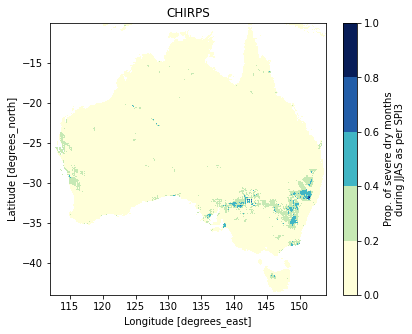

In [15]:
fig_dir = 'figures/drought_2017to2020/precip/baseline_198101_202005/'
mon_sel = slice(6, 9)  # selected months JJAS, which appear mostly dry for each year from 2017 to 2019
total_months = 4*3     # 4 months from each year

import matplotlib.pyplot as plt

for idata in range(len(data_name)):
    lat_size = abs((spi_list_severe_dry_bymon[idata].lat[0]-spi_list_severe_dry_bymon[idata].lat[-1]).values)
    lon_size = abs((spi_list_severe_dry_bymon[idata].lon[0]-spi_list_severe_dry_bymon[idata].lon[-1]).values)
    aspect = lon_size/lat_size

    levels = [0, 0.2, 0.4, 0.6, 0.8, 1.0001]
    ((spi_list_severe_dry_bymon[idata].sel(month = slice(6, 9)).sum('month')/total_months)*mask_list[idata]).rename('Prop. of severe dry months during JJAS as per SPI3').plot(x = "lon", y = "lat", aspect = aspect, size = 5, levels = levels, cmap = "YlGnBu") #, cmap = "RdBu", levels = levels
    plt.title(data_name[idata])
    plt.savefig(fig_dir + 'Prop_severe_dry_JJAS_months_asper_spi3_' + data_name[idata] + '.png')

In [10]:
spi_list_dry[0]

<xarray.DataArray 'count months' (lat: 340, lon: 420)>
array([[10, 10, 10, ...,  5,  5,  5],
       [ 9, 10, 10, ...,  5,  5,  6],
       [10, 10, 10, ...,  5,  5,  6],
       ...,
       [ 4,  4,  4, ...,  5,  5,  4],
       [ 4,  4,  4, ...,  3,  4,  4],
       [ 3,  3,  3, ...,  4,  4,  6]])
Coordinates:
  * lat      (lat) float32 -10.05 -10.15 -10.25 -10.35 ... -43.75 -43.85 -43.95
  * lon      (lon) float32 112.1 112.2 112.3 112.4 ... 153.7 153.8 153.9 153.9

In [ ]:
fig_dir = 'figures/drought_2017to2020/precip/'

import matplotlib.pyplot as plt

for idata in range(len(data_name)):
    lat_size = abs((spi_list_dry[idata].lat[0]-spi_list_dry[idata].lat[-1]).values)
    lon_size = abs((spi_list_dry[idata].lon[0]-spi_list_dry[idata].lon[-1]).values)
    aspect = lon_size/lat_size

    levels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    ((spi_list_dry[idata]/36)*mask_list[idata]).rename('Prop. of dry months as per SPI3').plot(x = "lon", y = "lat", aspect = aspect, size = 5, levels = levels, cmap = "YlGnBu") #, cmap = "RdBu", levels = levels
    plt.title(data_name[idata])
    plt.savefig(fig_dir + 'Prop_dry_months_asper_spi3_' + data_name[idata] + '.png')

### SPEI

In [7]:
%who

d	 da1	 da1_mon	 da2	 da2_mon	 data_dir	 data_list	 data_name	 data_name_2	 
ds	 ds_agcd	 ds_chirps	 ds_mask	 ds_mswep	 figname_prefix	 filename	 fname_prefix	 glob	 
i_ds	 mask_list	 np	 out_dir	 pd	 plt	 spi_list_dry	 spi_list_dry_bymon	 spi_list_severe_dry	 
spi_list_severe_dry_bymon	 time_slice	 vname	 xr	 


In [1]:
# ! mkdir figures/drought_2017to2020/PminusPET

In [8]:
import numpy as np
import xarray as xr
import pandas as pd
import glob
import matplotlib.pyplot as plt
%run -i drought_2017to2020/alldata_info.py

data_dir = '/g/data/w97/ad9701/drought_2017to2020/PminusPET/'

out_dir = 'figures/drought_2017to2020/PminusPET/'
figname_prefix = 'spei_3m'
fname_prefix = 'SPEI3'
vname = 'SPEI3'
#levels = 7 #np.linspace(0, 7, 8)

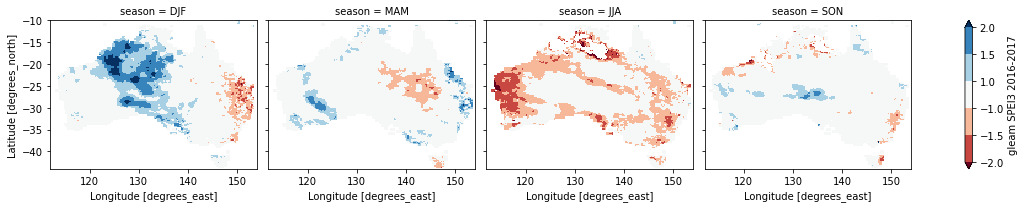

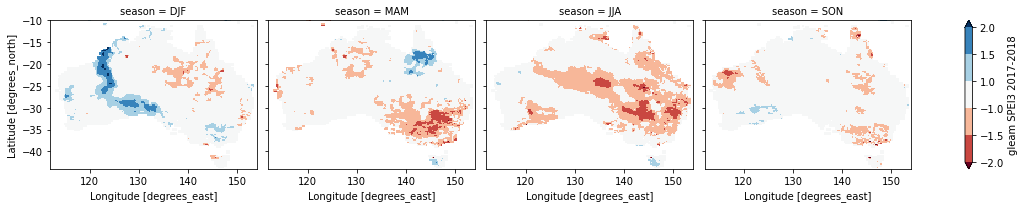

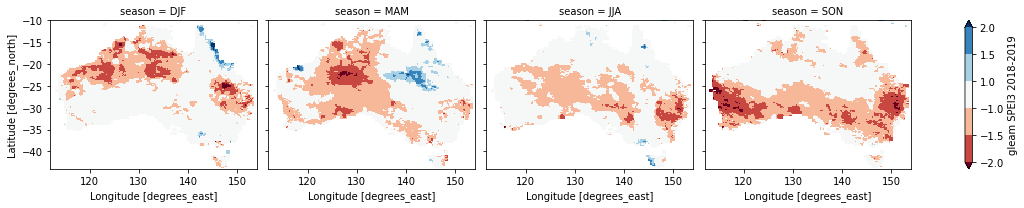

In [3]:
seas_order = ['DJF', 'MAM', 'JJA', 'SON']
levels = [-2, -1.5, -1, 1, 1.5, 2]

d = 'gleam'
for year in [2017, 2018, 2019]:#range(2003, 2022):
    fname = glob.glob(data_dir + fname_prefix + '*' + d  + '*.nc')[0]
    ds = xr.open_dataset(fname)
    da = ds[vname].sel(time = slice(str(year-1)+'-12', str(year)+'-11')).load()
    # if alldata_dict[d]['land_mask']:
    #     ds_mask = xr.open_dataset(data_dir + d + '_land_mask.nc')
    #     da = da*ds_mask['land_mask']
    # ds_mask = xr.open_dataset(data_dir + d + '_land_mask.nc')
    # da = da*ds_mask['land_mask']
    
    lat_size = abs((ds.lat[0]-ds.lat[-1]).values)
    lon_size = abs((ds.lon[0]-ds.lon[-1]).values)
    aspect = lon_size/lat_size

    da.groupby('time.season').mean().rename(d + ' ' + vname + ' ' + str(year-1) + '-' + str(year)).sel(season = seas_order).plot(x = "lon", y = "lat", col = "season", col_wrap = 4, aspect = aspect, size = 3, cmap = "RdBu", levels = levels) #"RdBu_r") "YlGnBu"
    plt.savefig(out_dir + figname_prefix + '_' + str(year-1) + '_' + str(year) + '_byseas' + '_' + d + '.png')

### Monthly

In [4]:
figname_prefix

'spei_3m'

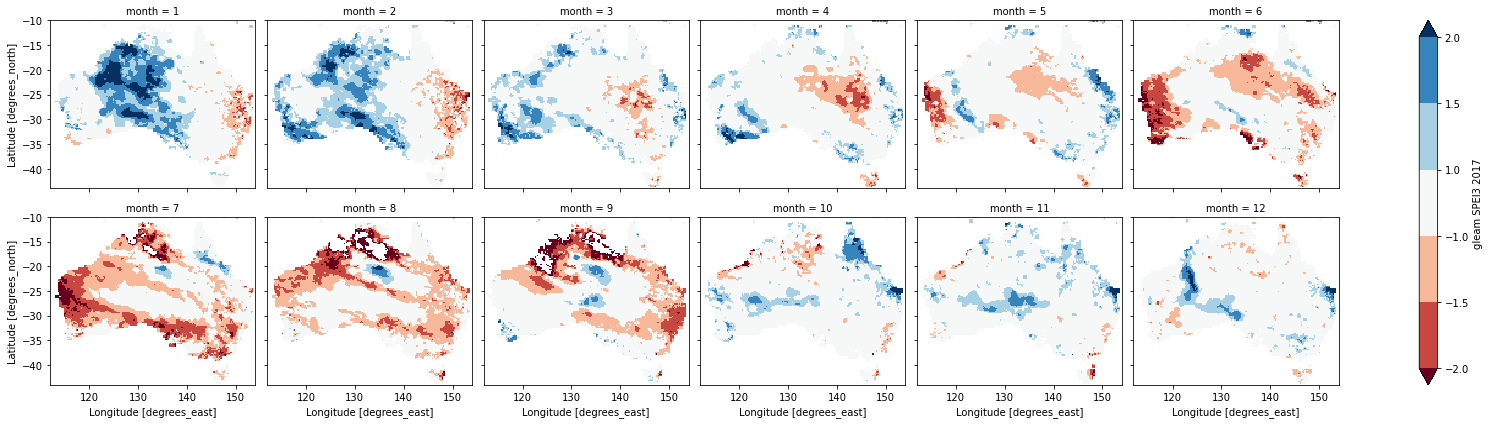

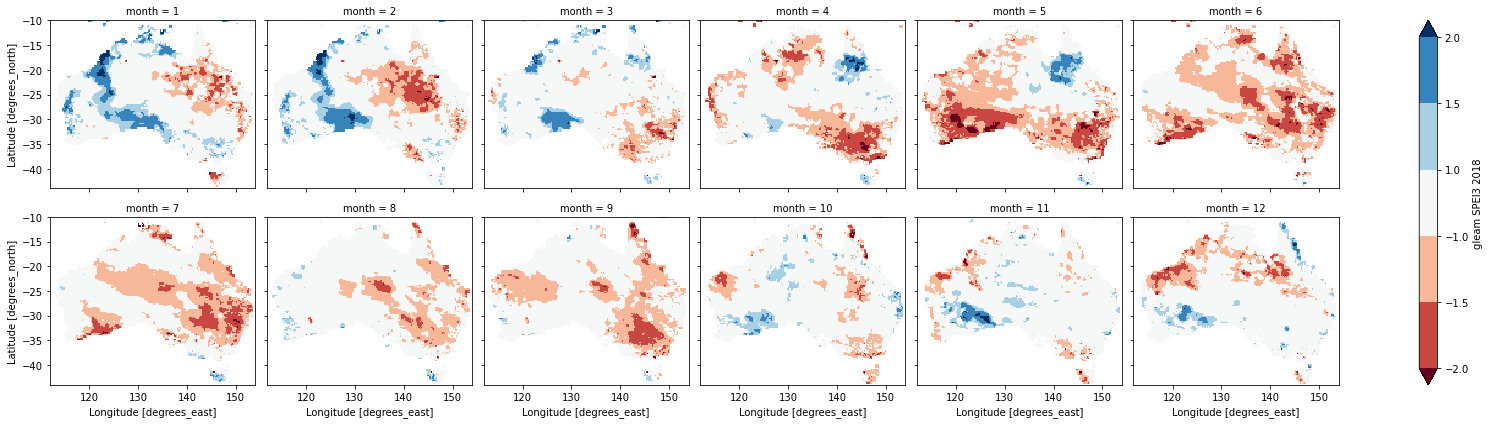

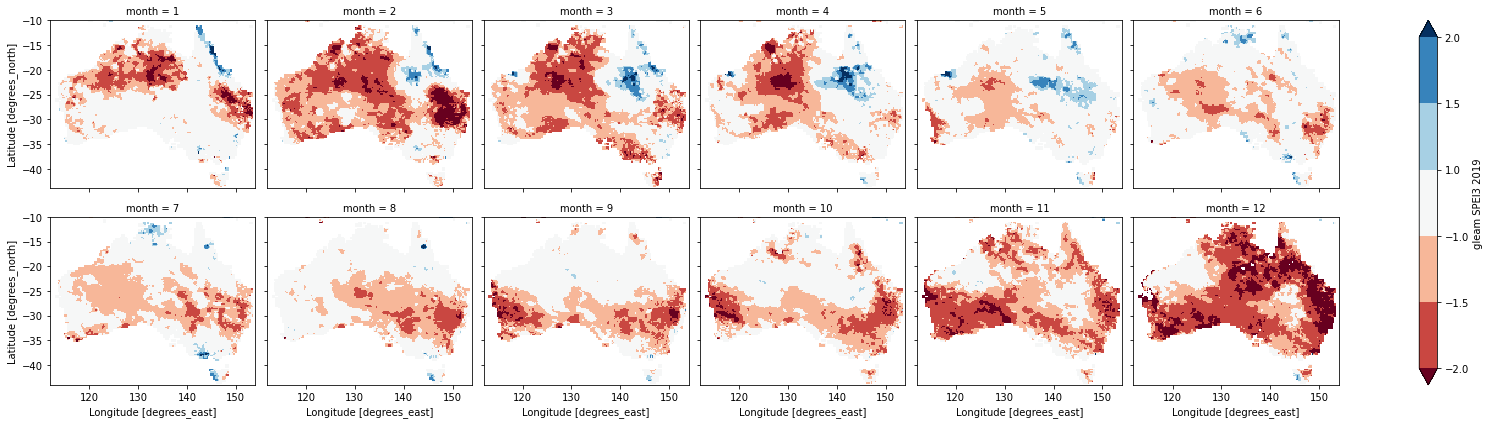

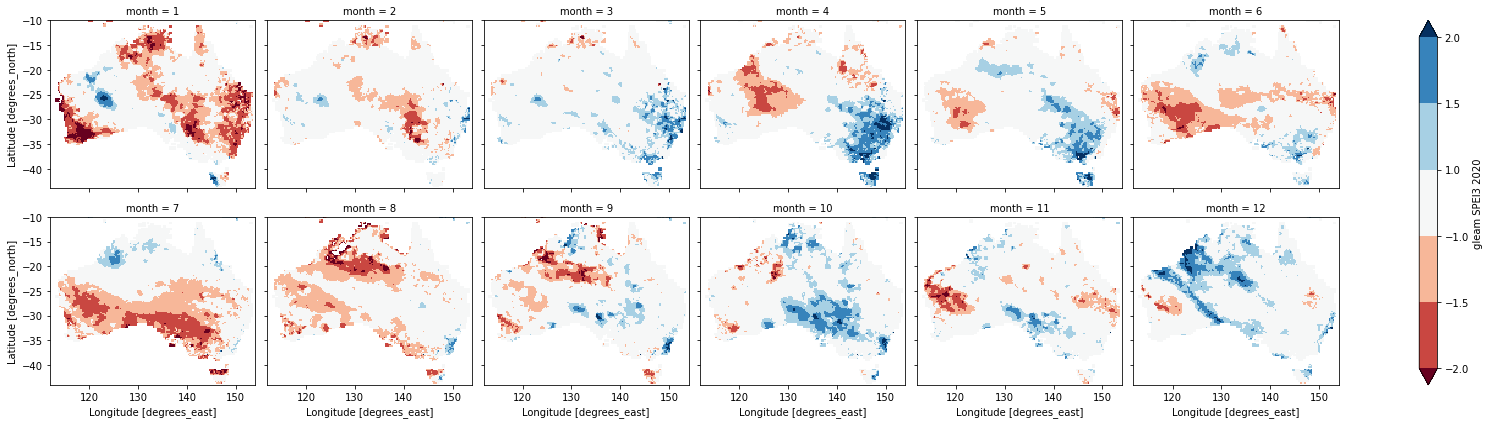

In [5]:
levels = [-2, -1.5, -1, 1, 1.5, 2]

d = 'gleam'
for year in [2017, 2018, 2019, 2020]:#range(2003, 2022):
    fname = glob.glob(data_dir + fname_prefix + '*' + d  + '*.nc')[0]
    ds = xr.open_dataset(fname)
    da = ds[vname].sel(time = slice(str(year), str(year))).load()
    # ds_mask = xr.open_dataset(data_dir + d + '_land_mask.nc')
    # da = da*ds_mask['land_mask']
    
    lat_size = abs((ds.lat[0]-ds.lat[-1]).values)
    lon_size = abs((ds.lon[0]-ds.lon[-1]).values)
    aspect = lon_size/lat_size

    da.groupby('time.month').mean().rename(d + ' ' + vname + ' ' + str(year)).plot(x = "lon", y = "lat", col = "month", col_wrap = 6, aspect = aspect, size = 3, cmap = "RdBu", levels = levels) #"RdBu_r") "YlGnBu"
    plt.savefig(out_dir + figname_prefix + '_' + str(year) + '_bymon' + '_' + d + '.png')
    # del ds, fname

### Areas consistently in drought: SPEI

In [9]:
import numpy as np
import xarray as xr
import pandas as pd
import glob
import matplotlib.pyplot as plt

data_dir = '/g/data/w97/ad9701/drought_2017to2020/PminusPET/SPEI3_baseline_198101_202005/'

out_dir = 'figures/drought_2017to2020/PminusPET/baseline_198101_202005/'
figname_prefix = 'SPEI3'
fname_prefix = 'SPEI3'
vname = 'SPEI3'

time_slice = slice('2017-01-01', '2019-12-31')

filename = glob.glob(data_dir + 'SPEI3_gleam_*.nc')[0]
ds_gleam = xr.open_dataset(filename)
ds_gleam = ds_gleam.sel(time = time_slice)

filename = glob.glob(data_dir + 'SPEI3_awra_*.nc')
ds_awra = xr.open_mfdataset(filename)
ds_awra = ds_awra.sel(time = time_slice)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/matplotlib/colors.py:1253: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin


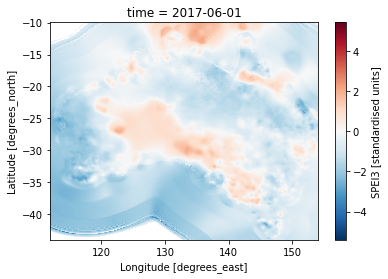

In [30]:
ds_awra['SPEI3'][5,:,:].plot()

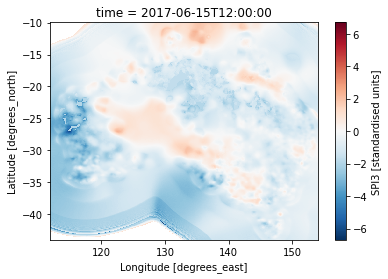

In [33]:
ds_agcd['SPI3'][5,:,:].plot()

In [10]:
data_name = ['GLEAM & MSWEP', 'AWRA & AGCD']
spei_list_dry = []
spei_list_dry_bymon = []
spei_list_severe_dry = []
spei_list_severe_dry_bymon = []
for ds in [ds_gleam]: #, ds_awra]:
    da1 = ds[vname].where(ds[vname]<= -1).count('time').rename('count months')
    da1_mon = ds[vname].where(ds[vname]<= -1).groupby('time.month').count('time').rename('count months')
    spei_list_dry.append(da1)
    spei_list_dry_bymon.append(da1_mon)
    da2 = ds[vname].where(ds[vname]<= -1.5).count('time').rename('count months')
    da2_mon = ds[vname].where(ds[vname]<= -1.5).groupby('time.month').count('time').rename('count months')
    spei_list_severe_dry.append(da2)
    spei_list_severe_dry_bymon.append(da2_mon)

In [36]:
mask_list[1]

<xarray.DataArray 'land_mask' (lat: 681, lon: 841)>
[572721 values with dtype=float64]
Coordinates:
  * lon      (lon) float32 112.0 112.1 112.1 112.2 ... 153.9 153.9 153.9 154.0
  * lat      (lat) float32 -44.0 -43.95 -43.9 -43.85 ... -10.1 -10.05 -10.0

In [11]:
for ds in [ds_awra]: #, ds_awra]:
    da1 = ds[vname].where(ds[vname]<= -1).count('time').rename('count months')
    da1 = da1*mask_list[1]
    da1_mon = ds[vname].where(ds[vname]<= -1).groupby('time.month').count('time').rename('count months')
    da1_mon = da1_mon*mask_list[1]
    spei_list_dry.append(da1)
    spei_list_dry_bymon.append(da1_mon)
    
    da2 = ds[vname].where(ds[vname]<= -1.5).count('time').rename('count months')
    da2 = da2*mask_list[1]
    da2_mon = ds[vname].where(ds[vname]<= -1.5).groupby('time.month').count('time').rename('count months')
    da2_mon = da2_mon*mask_list[1]
    spei_list_severe_dry.append(da2)
    spei_list_severe_dry_bymon.append(da2_mon)

In [23]:
spei_list_severe_dry_bymon

[<xarray.DataArray 'count months' (month: 12, lat: 136, lon: 168)>
 array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
 ...
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 

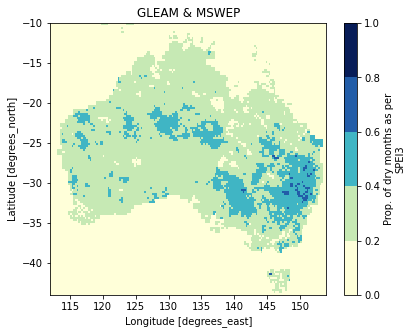

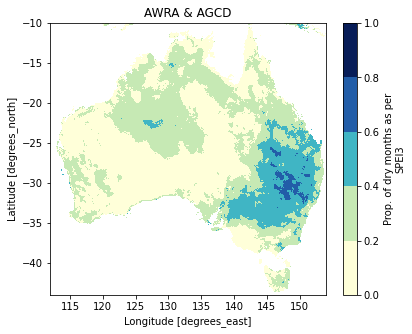

In [49]:
fig_dir = 'figures/drought_2017to2020/PminusPET/baseline_198101_202005/'

import matplotlib.pyplot as plt

for idata in range(len(data_name)):
    lat_size = abs((spei_list_dry[idata].lat[0]-spei_list_dry[idata].lat[-1]).values)
    lon_size = abs((spei_list_dry[idata].lon[0]-spei_list_dry[idata].lon[-1]).values)
    aspect = lon_size/lat_size

    levels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    
    (spei_list_dry[idata]/36).rename('Prop. of dry months as per SPEI3').plot(x = "lon", y = "lat", aspect = aspect, size = 5, levels = levels, cmap = "YlGnBu") #, cmap = "RdBu", levels = levels
    plt.title(data_name[idata])
    plt.savefig(fig_dir + 'Prop_dry_months_asper_spei3_' + data_name[idata] + '.png')

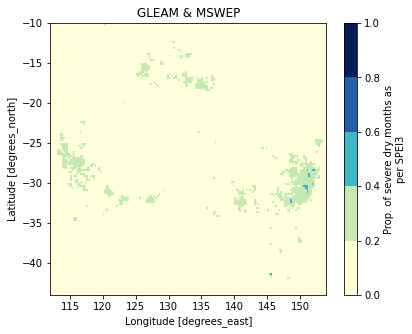

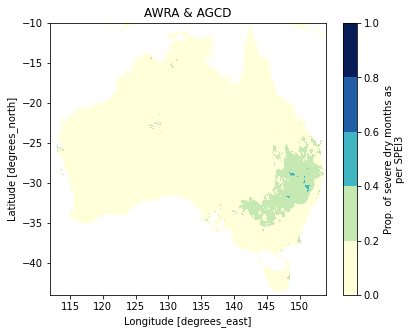

In [50]:
fig_dir = 'figures/drought_2017to2020/PminusPET/baseline_198101_202005/'

import matplotlib.pyplot as plt

for idata in range(len(data_name)):
    lat_size = abs((spei_list_dry[idata].lat[0]-spei_list_dry[idata].lat[-1]).values)
    lon_size = abs((spei_list_dry[idata].lon[0]-spei_list_dry[idata].lon[-1]).values)
    aspect = lon_size/lat_size

    levels = [0, 0.2, 0.4, 0.6, 0.8, 1.0001]
    (spei_list_severe_dry[idata]/36).rename('Prop. of severe dry months as per SPEI3').plot(x = "lon", y = "lat", aspect = aspect, size = 5, levels = levels, cmap = "YlGnBu") #, cmap = "RdBu", levels = levels
    plt.title(data_name[idata])
    plt.savefig(fig_dir + 'Prop_severe_dry_months_asper_spei3_' + data_name[idata] + '.png')

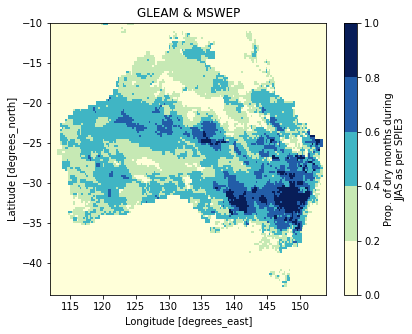

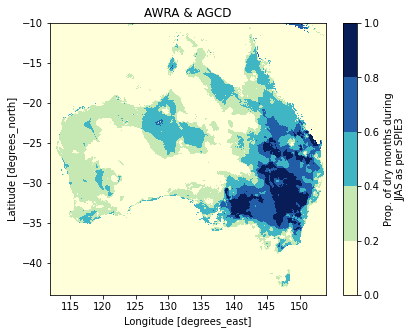

In [51]:
fig_dir = 'figures/drought_2017to2020/PminusPET/baseline_198101_202005/'
mon_sel = slice(6, 9)  # selected months JJAS, which appear mostly dry for each year from 2017 to 2019
total_months = 4*3     # 4 months from each year

import matplotlib.pyplot as plt

for idata in range(len(data_name)):
    lat_size = abs((spei_list_severe_dry_bymon[idata].lat[0]-spei_list_severe_dry_bymon[idata].lat[-1]).values)
    lon_size = abs((spei_list_severe_dry_bymon[idata].lon[0]-spei_list_severe_dry_bymon[idata].lon[-1]).values)
    aspect = lon_size/lat_size

    levels = [0, 0.2, 0.4, 0.6, 0.8, 1.0001]
    (spei_list_dry_bymon[idata].sel(month = slice(6, 9)).sum('month')/total_months).rename('Prop. of dry months during JJAS as per SPEI3').plot(x = "lon", y = "lat", aspect = aspect, size = 5, levels = levels, cmap = "YlGnBu") #, cmap = "RdBu", levels = levels
    plt.title(data_name[idata])
    plt.savefig(fig_dir + 'Prop_dry_JJAS_months_asper_spei3_' + data_name[idata] + '.png')

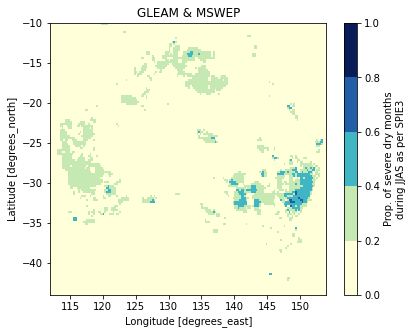

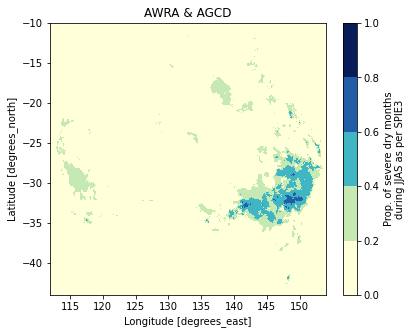

In [52]:
fig_dir = 'figures/drought_2017to2020/PminusPET/baseline_198101_202005/'
mon_sel = slice(6, 9)  # selected months JJAS, which appear mostly dry for each year from 2017 to 2019
total_months = 4*3     # 4 months from each year

import matplotlib.pyplot as plt

for idata in range(len(data_name)):
    lat_size = abs((spei_list_severe_dry_bymon[idata].lat[0]-spei_list_severe_dry_bymon[idata].lat[-1]).values)
    lon_size = abs((spei_list_severe_dry_bymon[idata].lon[0]-spei_list_severe_dry_bymon[idata].lon[-1]).values)
    aspect = lon_size/lat_size

    levels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    (spei_list_severe_dry_bymon[idata].sel(month = slice(6, 9)).sum('month')/total_months).rename('Prop. of severe dry months during JJAS as per SPEI3').plot(x = "lon", y = "lat", aspect = aspect, size = 5, levels = levels, cmap = "YlGnBu") #, cmap = "RdBu", levels = levels
    plt.title(data_name[idata])
    plt.savefig(fig_dir + 'Prop_severe_dry_JJAS_months_asper_spei3_' + data_name[idata] + '.png')

In [12]:
spei_list_dry_bymon

[<xarray.DataArray 'count months' (month: 12, lat: 136, lon: 168)>
 array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
 ...
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 

In [14]:
spi_list_dry_bymon[0]

<xarray.DataArray (month: 12, lat: 340, lon: 420)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * lon      (lon) float64 112.1 112.2 112.3 112.4 ... 153.7 153.8 153.9 153.9
  * lat      (lat) float64 -10.05 -10.15 -10.25 -10.35 ... -43.75 -43.85 -43.95
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [15]:
list_alldata = spi_list_dry_bymon
list_alldata.extend(spei_list_dry_bymon)
mon_sel = slice(6, 9)  # selected months JJAS, which appear mostly dry for each year from 2017 to 2019
total_months = 4*3     # 4 months from each year

list_coolmon_alldata = []
for i in range(len(list_alldata)):
    da_idata = list_alldata[i].sel(month = mon_sel).sum('month')/total_months
    list_coolmon_alldata.append(da_idata)

In [24]:
data_names = ['SPI3_mswep', 'SPI3_agcd', 'SPI3_chirps', 'SPEI3_gleam', 'SPEI3_awra']

In [23]:
list_coolmon_alldata[4]

# 0: lat: 340, lon: 420
# 1: lat: 681, lon: 841
# 2: lat: 680, lon: 840
# 3: lat: 136, lon: 168
# 4: lat: 681, lon: 841

<xarray.DataArray (lat: 681, lon: 841)>
dask.array<truediv, shape=(681, 841), dtype=float64, chunksize=(341, 421), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 112.0 112.1 112.1 112.2 ... 153.9 153.9 153.9 154.0
  * lat      (lat) float64 -44.0 -43.95 -43.9 -43.85 ... -10.1 -10.05 -10.0

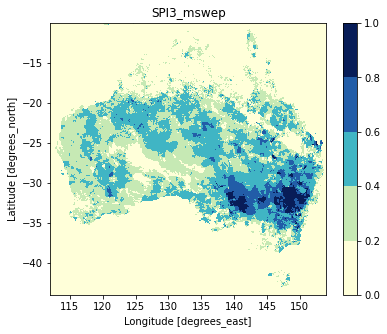

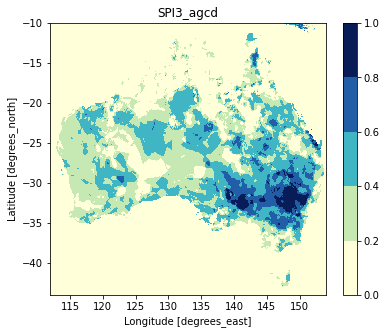

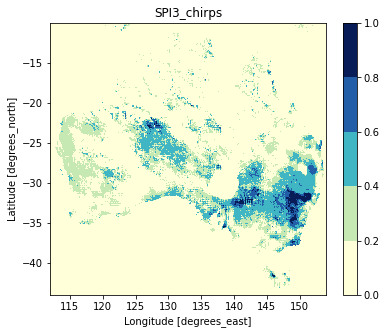

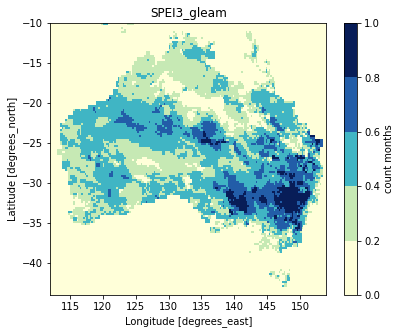

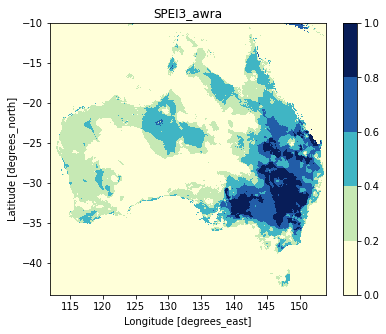

In [31]:
out_dir = 'figures/drought_2017to2020/fnl_spi3_spei3_prop_dry/'
levels = [0, 0.2, 0.4, 0.6, 0.8, 1.0001]

for idata in range(len(list_coolmon_alldata)):
    lat_size = abs((list_coolmon_alldata[idata].lat[0]-list_coolmon_alldata[idata].lat[-1]).values)
    lon_size = abs((list_coolmon_alldata[idata].lon[0]-list_coolmon_alldata[idata].lon[-1]).values)
    aspect = lon_size/lat_size
    
    list_coolmon_alldata[idata].plot(x = "lon", y = "lat", aspect = aspect, size = 5, levels = levels, cmap = "YlGnBu")
    plt.title(data_names[idata])
    plt.savefig(out_dir + data_names[idata] + '_prop_dry_JJAS_2017to19.png')

In [43]:
# regrid all to the 

import xesmf as xe
ds_out = xr.Dataset(
    {
        "lat": (["lat"], np.arange(-10.125, -44.125, -0.25)),
        "lon": (["lon"], np.arange(112.125, 154.125, 0.25)),
    }
)

list_coolmon_alldata_reg = []

for idata in range(len(list_coolmon_alldata)):
    da = list_coolmon_alldata[idata].chunk({'lat':-1, 'lon':-1})
    if idata == 3:
        list_coolmon_alldata_reg.append(da)
    else:
        regridder = xe.Regridder(da, ds_out, 'bilinear')
        da_reg = regridder(da)
        list_coolmon_alldata_reg.append(da_reg)


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/array/core.py:454: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)


In [49]:
da_coolmon_alldata = xr.concat(list_coolmon_alldata_reg, dim = 'data').assign_coords({'data': data_names})

In [51]:
da_coolmon_alldata_mean = da_coolmon_alldata.mean('data')

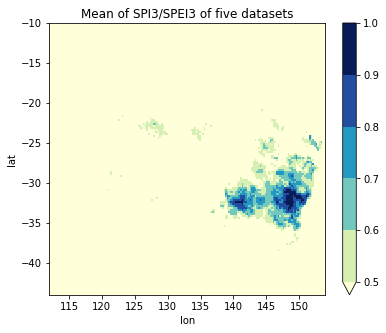

In [55]:
lat_size = abs((da_coolmon_alldata_mean.lat[0]-da_coolmon_alldata_mean.lat[-1]).values)
lon_size = abs((da_coolmon_alldata_mean.lon[0]-da_coolmon_alldata_mean.lon[-1]).values)
aspect = lon_size/lat_size
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0001]

da_coolmon_alldata_mean.plot(x = "lon", y = "lat", aspect = aspect, size = 5, levels = levels, cmap = "YlGnBu")
plt.title('Mean of SPI3/SPEI3 of five datasets')
plt.savefig(out_dir + 'mean_alldata_prop_dry_JJAS_2017to19.png')

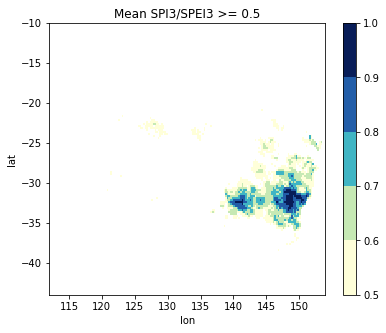

In [54]:
thresh = 0.5

lat_size = abs((da_coolmon_alldata_mean.lat[0]-da_coolmon_alldata_mean.lat[-1]).values)
lon_size = abs((da_coolmon_alldata_mean.lon[0]-da_coolmon_alldata_mean.lon[-1]).values)
aspect = lon_size/lat_size

levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0001]
da_coolmon_alldata_mean.where(da_coolmon_alldata_mean>=thresh).plot(x = "lon", y = "lat", aspect = aspect, size = 5, levels = levels, cmap = "YlGnBu")
plt.title('Mean SPI3/SPEI3 >= 0.5')
plt.savefig(out_dir + 'mean_alldata_prop_dry_JJAS_2017to19_gt_pt5.png')

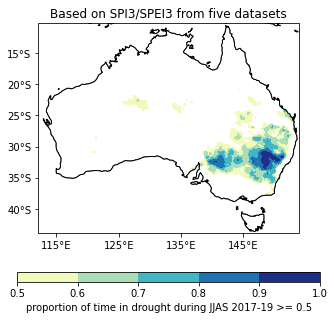

In [74]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

ds = da_coolmon_alldata_mean

fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(6,4.5)) #width, height

xlim = [ds['lon'].values.min(), ds['lon'].values.max()]
ylim = [ds['lat'].values.min(), ds['lat'].values.max()]

xticks = np.arange(115,155,10)  #lon
yticks = np.arange(-40,-10,5)   #lat

cs=axs.contourf(ds['lon'],ds['lat'],ds,levels,
                      transform = ccrs.PlateCarree(),
                      cmap="YlGnBu") #,extend='both')   #cmap options: coolwarm,

# Draw the coastines for each subplot
axs.coastlines()
axs.add_feature(cfeature.OCEAN, zorder=2, edgecolor='k', facecolor='w')

axs.set_title('Based on SPI3/SPEI3 from five datasets')

# Longitude labels
axs.set_xticks(xticks, crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.set_xlim(xlim)

# Latitude labels
axs.set_yticks(yticks, crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter)
axs.set_ylim(ylim)

# Delete the unwanted axes
# for i in [5]:
#     fig.delaxes(axs[i])

# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.3, top=0.95, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.08)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.15, 0.15, 0.7, 0.03])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal', label='proportion of time in drought during JJAS 2017-19 >= 0.5')

plt.savefig(out_dir + 'mean_alldata_prop_dry_JJAS_2017to19_gt_pt5.png')

In [61]:
out_file = '/g/data/w97/ad9701/drought_2017to2020/prop_time_dry_JJAS_2017to19.nc'
da_coolmon_alldata.to_netcdf(out_file)

### CHIRPS

In [6]:
import xarray as xr
import glob
import pandas as pd

main_dir = '/g/data/w97/ad9701/CHIRPS-2.0/global_monthly_EWX/zscore/netcdf/'
levels = [-2, -1.5, -1, 1, 1.5, 2]

fnames = sorted(glob.glob(main_dir + 'zscore.*.tiff.nc'))
fnames
ds = xr.open_mfdataset(fnames, concat_dim = 'time', combine = 'nested')

n_periods = (2021-1981+1)*12
time = pd.date_range("1981-01-01", freq="M", periods=n_periods)
ds = ds.assign_coords({'time': time})

# d = 'chirps'
# for year in [2017, 2018, 2019, 2020]:#range(2003, 2022):
#     fname = glob.glob(data_dir + fname_prefix + '*' + d  + '*.nc')[0]
#     ds = xr.open_dataset(fname)
#     da = ds[vname].sel(time = slice(str(year), str(year))).load()
#     # ds_mask = xr.open_dataset(data_dir + d + '_land_mask.nc')
#     # da = da*ds_mask['land_mask']
    
#     lat_size = abs((ds.lat[0]-ds.lat[-1]).values)
#     lon_size = abs((ds.lon[0]-ds.lon[-1]).values)
#     aspect = lon_size/lat_size

#     da.groupby('time.month').mean().rename(d + ' ' + vname + ' ' + str(year)).plot(x = "lon", y = "lat", col = "month", col_wrap = 6, aspect = aspect, size = 3, cmap = "RdBu", levels = levels) #"RdBu_r") "YlGnBu"
#     plt.savefig(out_dir + figname_prefix + '_' + str(year) + '_bymon' + '_' + d + '.png')
#     # del ds, fname

In [9]:
ds_subset = ds.sel(lat = slice(-10, -44), lon = slice(112, 154))
ds_subset

<xarray.Dataset>
Dimensions:  (lat: 680, lon: 840, time: 492)
Coordinates:
  * lat      (lat) float64 -10.03 -10.08 -10.13 -10.18 ... -43.88 -43.93 -43.98
  * lon      (lon) float64 112.0 112.1 112.1 112.2 ... 153.8 153.9 153.9 154.0
  * time     (time) datetime64[ns] 1981-01-31 1981-02-28 ... 2021-12-31
Data variables:
    zscore   (time, lat, lon) float32 dask.array<chunksize=(1, 680, 840), meta=np.ndarray>

In [10]:
ds_subset.to_netcdf('/g/data/w97/ad9701/drought_2017to2020/precip_data/zscore_chirps_monthly_1981_2021.nc')

In [7]:
ds

<xarray.Dataset>
Dimensions:  (lat: 2000, lon: 7200, time: 492)
Coordinates:
  * lat      (lat) float64 49.97 49.92 49.87 49.82 ... -49.88 -49.93 -49.98
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
  * time     (time) datetime64[ns] 1981-01-31 1981-02-28 ... 2021-12-31
Data variables:
    zscore   (time, lat, lon) float32 dask.array<chunksize=(1, 2000, 7200), meta=np.ndarray>

In [ ]:
ds['zscore']

In [12]:
np.linspace(0, 25, 5)

array([ 0.  ,  6.25, 12.5 , 18.75, 25.  ])

## Scratch Space

In [39]:
ds_mask#['land_mask']

'/g/data/w97/ad9701/drought_2017to2020/precip_data/chirps_land_mask.nc'

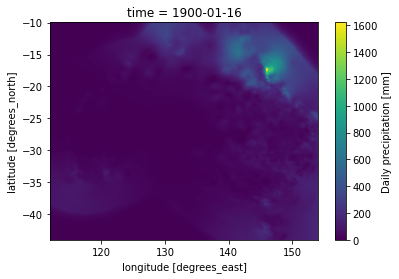

In [22]:
d = 'agcd'
mon_file = glob.glob(data_dir + d + '_monthly*.nc')[0]
ds_mon = xr.open_dataset(mon_file)
ds_mon[alldata_dict[d]['varname']][0,:,:].plot()

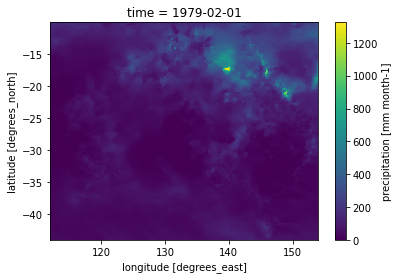

In [23]:
d = 'mswep'
mon_file = glob.glob(data_dir + alldata_dict[d]['varname'] + '_' + d + '_monthly*.nc')[0]
ds_mon = xr.open_dataset(mon_file)
ds_mon[alldata_dict[d]['varname']][0,:,:].plot()

In [32]:
d = 'chirps'
mon_file = glob.glob(data_dir + d + '_monthly*.nc')[0]
ds_mon = xr.open_dataset(mon_file)
da_mask = xr.where(~np.isnan(ds_mon[alldata_dict[d]['varname']][0,:,:]), 1 , np.nan).rename('land_mask') #.plot()
da_mask.to_netcdf(data_dir + d + '_land_mask.nc')